<a href="https://colab.research.google.com/github/chilaact/Final-Project-DPS5-A/blob/master/DPS5_A_Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dataset from Kaggle

In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

In [0]:
import os
import zipfile

local_zip = '/content/new-plant-diseases-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Import libraries

In [0]:
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt

import os
import tensorflow as tf
from tensorflow.keras import Input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

## Transfer learning

In [0]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

Freeze the convolutional base

In [5]:
base_model.trainable = False
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

## Compile model

In [0]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
len(model.trainable_variables)

2

## Pre-processing data

In [18]:
batch_size =32
base_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(base_dir+'/train',
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(base_dir+'/valid',
                                                         target_size=(224, 224),
                                                         batch_size=batch_size,
                                                         class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [19]:
li = list(train_generator.class_indices.keys())

for i in li:
    print(i)

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___healthy


## Training model

In [20]:
history = model.fit(train_generator,
                    epochs=10, # dapat diganti bebas
                    steps_per_epoch=train_generator.samples//batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples//batch_size)
# save model
model.save('mobilenet.h5')

Epoch 1/10
2196/2196 [==============================] - 1014s 462ms/step - loss: 0.1375 - accuracy: 0.9709 - val_loss: 0.1240 - val_accuracy: 0.9737
Epoch 2/10
2196/2196 [==============================] - 995s 453ms/step - loss: 0.1230 - accuracy: 0.9737 - val_loss: 0.1235 - val_accuracy: 0.9737
Epoch 3/10
2196/2196 [==============================] - 1020s 464ms/step - loss: 0.1227 - accuracy: 0.9737 - val_loss: 0.1234 - val_accuracy: 0.9737
Epoch 4/10
2196/2196 [==============================] - 1001s 456ms/step - loss: 0.1225 - accuracy: 0.9737 - val_loss: 0.1232 - val_accuracy: 0.9737
Epoch 5/10
2196/2196 [==============================] - 1001s 456ms/step - loss: 0.1224 - accuracy: 0.9737 - val_loss: 0.1231 - val_accuracy: 0.9737
Epoch 6/10
2196/2196 [==============================] - 1004s 457ms/step - loss: 0.1223 - accuracy: 0.9737 - val_loss: 0.1232 - val_accuracy: 0.9737
Epoch 7/10
2196/2196 [==============================] - 1008s 459ms/step - loss: 0.1223 - accuracy: 0.9737 

## Graphic loss and accuracy during training

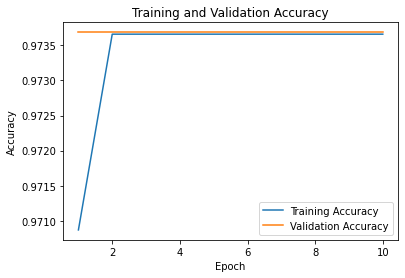

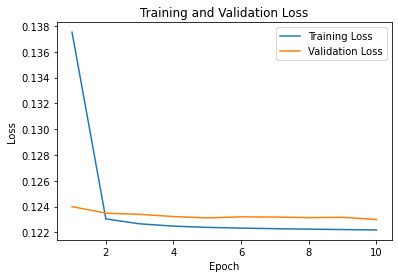

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# accuracy
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

# loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Load and testing model

In [0]:
model_termuat = load_model('mobilenet.h5')

Prediction result:


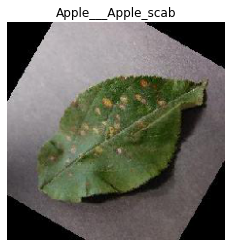

In [23]:
image_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Cedar_apple_rust/04da297e-5238-41b1-a8a0-0c87c6c2f21f___FREC_C.Rust 4394_new30degFlipLR.JPG"

# resize image
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = expand_dims(img, axis=0)
img = img/255

print("Prediction result:")
prediction = model_termuat.predict(img)

# choose class
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

# show image        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()